In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ham = nmr.Hamiltonian(10)

In [3]:
ham.H_cs_scrambling()

In [4]:
operator =  nmr.PauliMatrix(10)
sigz = (1/2**5)*nmr.lanczos.op_basis.vec(operator.sigmaZ(0))

In [12]:
solver = nmr.Lanczos(ham.to_super(),sigz)

In [26]:
solver.compute_lanczos_fast(use_ham=False,max_iter=15)

Computation took 4.105105699971318 sec


In [27]:
signal_fast = solver.auto_correlation(times=np.arange(0,5,.1))

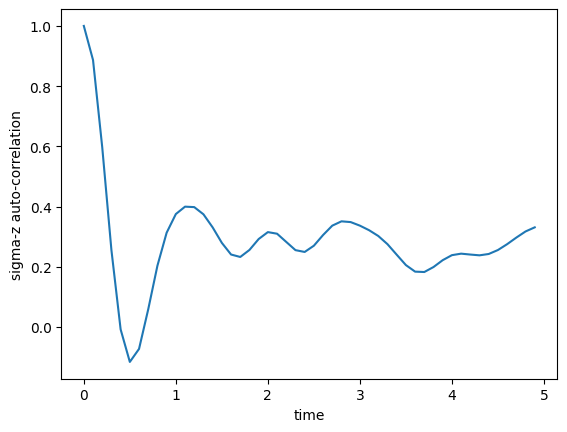

In [28]:
plt.plot(np.arange(0,5,.1),signal_fast)
plt.xlabel("time")
plt.ylabel("sigma-z auto-correlation")
plt.show()

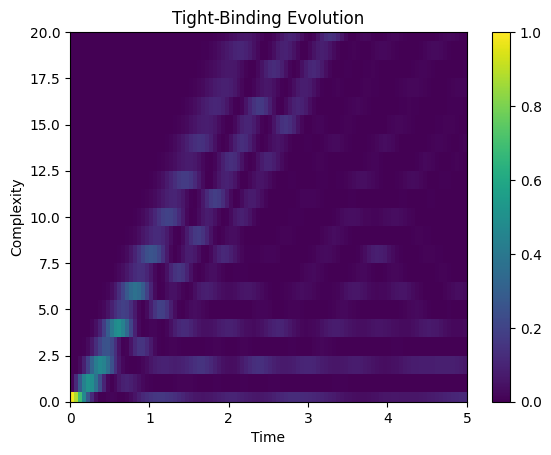

In [29]:
solver.tight_binding_complexity(0,5)

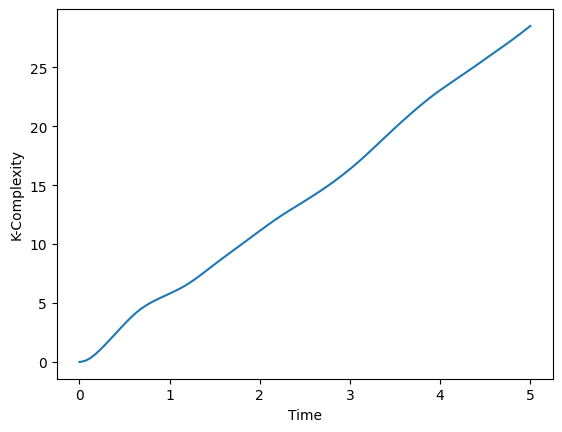

In [25]:
solver.compute_krylov_complexity()

In [56]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [57]:
time_vec = np.arange(0,5,.1)
ensemble_signal = np.zeros(len(time_vec))
num_trials = 100

In [58]:
for idx in range(num_trials):
    ham.clear()
    ham.H_cs_scrambling()
    solver = nmr.Lanczos(ham.to_super(),sigz)
    if idx+1 % 5 == 0:
        print(str(idx/num_trials * 100) + "% done")
    with HiddenPrints():
        solver.compute_lanczos_fast()

    ensemble_signal = ensemble_signal + (1/num_trials) * solver.auto_correlation(time_vec)
    del solver

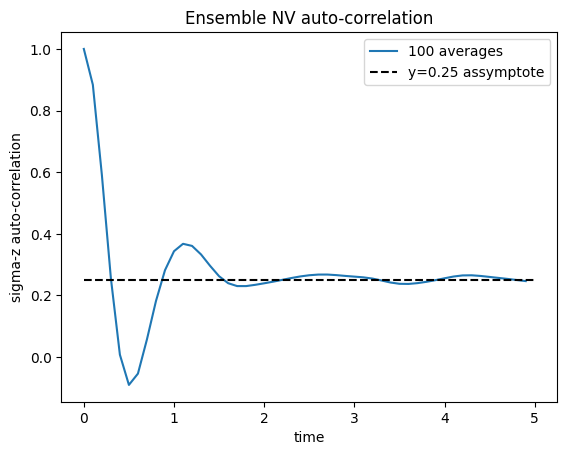

In [59]:
plt.plot(time_vec, ensemble_signal,label="100 averages")
plt.hlines(0.25,0,5,'k','dashed', label="y=0.25 assymptote")
plt.xlabel("time")
plt.ylabel("sigma-z auto-correlation")
plt.title("Ensemble NV auto-correlation")
plt.legend()
plt.show()